In [52]:
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

In [53]:
def standard_deviation(dist):
  variance = 0

  for i in dist:
    variance += (i - np.mean(dist)) ** 2

  variance /= len(dist)

  # print(variance)

  return variance ** 0.5

In [54]:
# testing function
standard_deviation([1, 2, 3, 4, 5])

1.4142135623730951

In [55]:
x1 = np.array([random.uniform(10, 15) for _ in range(50)])
x2 = np.array([random.uniform(10, 15) for _ in range(50)])

In [56]:
def calculate_t_value(sample1, sample2):
  mean_diff = x1.mean() - x2.mean()
  sd_1 = standard_deviation(sample1)
  sd_2 = standard_deviation(sample2)

  t = mean_diff / ((sd_1 ** 2 / len(sample1) + sd_2 ** 2 / len(sample2)) ** 0.5)

  return t

In [57]:
t = calculate_t_value(x1, x2)
t

-1.797639984347592

In [65]:
def probability(t_value, n):
  df = n - 2

  # we calculate for both tails:

  p = 2 * (1 - stats.t.cdf(abs(t), df))

  if p < 0.05:
    return f'Your p value is {p}. It is < 0.05 -> H1 is acceptable!'

  else:
    return f'Your p value is {p}. It is > 0.05 -> H0 can not be rejected'

In [66]:
n = len(x1) + len(x2)
probability(t, n)

'Your p value is 0.07531367267943057. It is > 0.05 -> H0 can not be rejected'

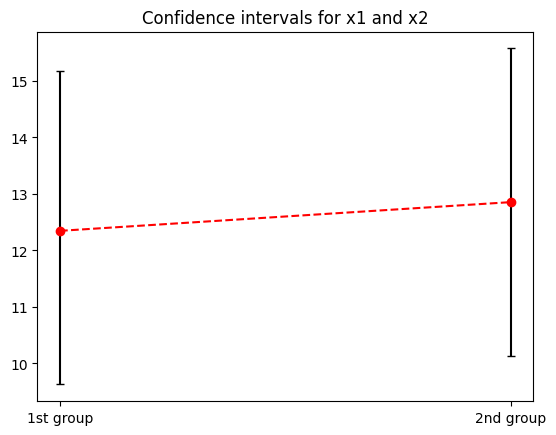

In [67]:
def build_confidence_intervals(x1, x2):
  p_10 = [1.96 * np.std(x1), 1.96 * np.std(x1)]
  p_90 = [1.96 * np.std(x2), 1.96 * np.std(x1)]
  M = [x1.mean(), x2.mean()]

  fig = plt.figure()
  x = ['1st group', '2nd group']
  y = M
  yerr = [p_10, # 'down' error
          p_90]  # 'up' error

  plt.title('Confidence intervals for x1 and x2')
  plt.errorbar(x, y, yerr=yerr, capsize=3, fmt="r--o", ecolor = "black")
  plt.show()

build_confidence_intervals(x1, x2)

As we can see mean of second lays in confidence interval of 1st group.
That's why we can not reject H0.